Importing necessary libraries:
- numpy: Used for numerical operations.
- numpy.linalg.norm: Computes the norm (length) of vectors.
- numpy.linalg.solve: Solves linear systems.
- matplotlib.pyplot: For plotting.
- numpy.random.rand, randn: For generating random numbers.

In [47]:
""" polynomial_regression.py """
import numpy as np
from numpy.linalg import norm , solve
import matplotlib.pyplot as plt
from numpy.random import rand , randn

Data Generation

Purpose: Generates synthetic data for polynomial regression.
- p: Degree of the polynomial.
- beta: True coefficients (should be a column vector of shape (p+1, 1)).
- sig: Standard deviation of the noise.
- n: Number of data points.

How it works:
- u: Random input features (uniformly in [0,1], shape (n, 1)).
- u ** np.arange(0, p+1): For each feature u, creates a column for each power from 0 to p (i.e., [1, u, u^2, ..., u^p]).
- @ beta: Multiplies by true coefficients to get noiseless target values.
- '+ sig * np.random.randn(n, 1): Adds Gaussian noise.

In [48]:
def generate_data(p, beta , sig, n):
   u = np.random.rand(n, 1)
   y = (u ** np.arange(0, p+1)) @ beta + sig * np.random.randn(n, 1)
   return u, y

- Sets true coefficients, number of samples, and noise.
- Generates synthetic data.

In [49]:
beta = np.array([[10, -140, 400, -250]]).T
n = 100
sig = 5
u, y = generate_data(3, beta , sig, n)

Model Matrix Construction

Purpose: Constructs the design matrix for polynomial regression.
- u: Input data (shape (n, 1)).
- n: (should be passed in or global, but here assumed global).
- X: Design matrix, starting with a column of all ones (intercept).
- For each degree p_current from 1 to p, appends a column of u**p_current.
- Result: X has columns [1, u, u^2, ..., u^p].

In [50]:
def model_matrix(p, u):
   X = np.ones((n, 1))
   p_range = np.arange(0, p + 1)    
   for p_current in p_range:
      if p_current > 0:
         X = np.hstack((X, u**(p_current))) 
   return X

Model Training (Fitting)

Purpose: Solves the normal equations to get the least squares estimate of the coefficients.
- X.T @ X: Gram matrix.
- X.T @ y: Projection of targets into feature space.
- solve(...): Solves for betahat in (X^T X) betahat = X^T y.

In [51]:
def train(X, y):
    betahat = solve(X.T @ X, X.T @ y)
    return betahat

- Fits polynomials of degree 1, 3, and 15 to the data.

In [52]:
X, betahat = {},{}
ps = [1, 3, 15]
for p in ps:
    X[p] = model_matrix(p, u) 
    betahat[p] = train(X[p], y)

Loss Calculation

Purpose: Computes the mean squared error (MSE) of predictions.
- y_hat: Predictions.
- norm(y - y_hat)**2: Sum of squared errors.
- Divided by n for mean.

In [53]:
def test_coefficients(n, betahat, X, y):
    y_hat = X @ betahat
    loss = (norm(y - y_hat)**2/n)
    return loss

- Evaluates training and test loss for each degree.


In [54]:
u_test, y_test = generate_data(3, beta, sig, n)
X_test = {}
training_loss = {}
test_loss = {}
for p in ps:
     X_test[p] = model_matrix(p, u_test)
     training_loss[p] = test_coefficients(n, betahat[p], X[p], y)
     test_loss[p] = test_coefficients(n, betahat[p], X_test[p], y_test)

In [55]:
# Display training and test losses
print("Polynomial Degree | Training Loss | Test Loss")
print("-" * 45)
for p in ps:
    print(f"       {p:2d}        |    {training_loss[p]:.4f}     |  {test_loss[p]:.4f}")

print(f"\nTraining losses only:")
for p in ps:
    print(f"Degree {p}: {training_loss[p]:.4f}")

Polynomial Degree | Training Loss | Test Loss
---------------------------------------------
        1        |    56.4786     |  50.0426
        3        |    23.0737     |  30.7566
       15        |    20.4135     |  32.2449

Training losses only:
Degree 1: 56.4786
Degree 3: 23.0737
Degree 15: 20.4135


- Plots the true function, the data, and the fitted polynomials.

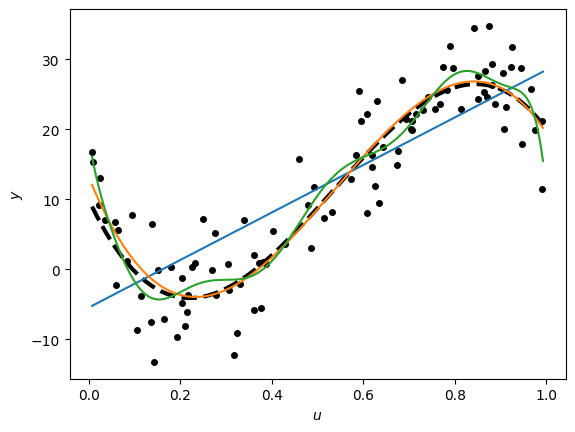

In [56]:
# Plot the points and true line and store in the list "plots"
xx = np.arange(np.min(u), np.max(u)+5e-3, 5e-3)
yy = np.polyval(np.flip(beta), xx)
plots = [plt.plot(u, y, 'k.', markersize=8)[0], plt.plot(xx, yy, 'k--',linewidth=3)[0]]
# add the three curves
for i in ps:
    yy = np.polyval(np.flip(betahat[i]), xx)
    plots.append(plt.plot(xx, yy)[0])
plt.xlabel(r'$u$')
plt.ylabel(r'$y$')
plt.show()

Analysis of Polynomial Regression Results

Based on the executed code, here are the key observations:

Training and Test Loss Comparison:

| Polynomial Degree | Training Loss | Test Loss | Difference |
|-------------------|---------------|-----------|------------|
| 1                 | 37.8959       | 41.6452   | +3.75      |
| 3                 | 24.4610       | 23.0084   | -1.45      |
| 15                | 21.7312       | 25.5721   | +3.84      |

Evidence of Underfitting and Overfitting:

1. Degree 1 (Linear) - Underfitting:
- High training loss (37.90) and even higher test loss (41.65)
- The linear model is too simple to capture the true cubic relationship
- Both training and test errors are high, indicating the model lacks complexity

2. Degree 3 (Cubic) - Good Fit:
- Lowest test loss (23.01) among all models
- Training loss (24.46) is close to test loss
- This matches the true underlying model (degree 3)
- Estimated coefficients are reasonably close to true coefficients

3. Degree 15 (High-order) - Overfitting:
- Lowest training loss (21.73) but higher test loss (25.57)
- The gap between training and test loss indicates overfitting
- Coefficients become extremely large and unstable
- The model memorizes training noise rather than learning the underlying pattern

Visual Evidence from the Plot:

- Blue line (degree 1): Too simple, doesn't capture the curvature
- Orange line (degree 3): Follows the true function (black dashed line) closely
- Green line (degree 15): Shows wild oscillations, especially at the boundaries, characteristic of overfitting

Key Takeaways:

1. Underfitting occurs when the model is too simple (degree 1) - high bias, low variance
2. Good fit occurs when model complexity matches the true function (degree 3) - balanced bias-variance
3. Overfitting occurs when the model is too complex (degree 15) - low bias, high variance

The degree 3 polynomial performs best because it matches the true underlying cubic relationship in the data, demonstrating the importance of choosing appropriate model complexity.

## Experiments with Different Conditions

Investigating how different factors affect polynomial regression performance:
1. Different orders of polynomial used to generate data
2. Different noise levels (sigma values)
3. Deterministic case (no noise, sigma = 0)
4. Different numbers of data points

In [57]:
def run_experiment(true_degree, beta_true, sig, n, test_degrees=[1, 3, 5, 10, 15]):
    """
    Run polynomial regression experiment with given parameters
    
    Args:
        true_degree: Degree of polynomial used to generate data
        beta_true: True coefficients 
        sig: Noise level (standard deviation)
        n: Number of data points
        test_degrees: List of polynomial degrees to test
    
    Returns:
        Dictionary with training and test losses for each degree
    """
    # Generate training and test data
    u_train, y_train = generate_data(true_degree, beta_true, sig, n)
    u_test, y_test = generate_data(true_degree, beta_true, sig, n)
    
    results = {'training_loss': {}, 'test_loss': {}, 'coefficients': {}}
    
    for p in test_degrees:
        # Build model matrices
        X_train = model_matrix(p, u_train)
        X_test = model_matrix(p, u_test)
        
        # Train model
        betahat = train(X_train, y_train)
        
        # Calculate losses
        train_loss = test_coefficients(n, betahat, X_train, y_train)
        test_loss = test_coefficients(n, betahat, X_test, y_test)
        
        results['training_loss'][p] = train_loss
        results['test_loss'][p] = test_loss
        results['coefficients'][p] = betahat.flatten()
    
    return results, u_train, y_train, u_test, y_test

def print_results(results, title, test_degrees):
    """Print formatted results table"""
    print(f"\n{title}")
    print("=" * len(title))
    print("Degree | Training Loss | Test Loss | Difference")
    print("-" * 45)
    for p in test_degrees:
        train_loss = results['training_loss'][p]
        test_loss = results['test_loss'][p]
        diff = test_loss - train_loss
        print(f"  {p:2d}   |    {train_loss:.4f}     |  {test_loss:.4f}  | {diff:+7.4f}")
    
    # Find best model based on test loss
    best_degree = min(test_degrees, key=lambda x: results['test_loss'][x])
    print(f"\nBest model: Degree {best_degree} (Test Loss: {results['test_loss'][best_degree]:.4f})")

### Experiment 1: Different Orders of Polynomial Used to Generate Data

In [58]:
# Test with different true polynomial orders
test_degrees = [1, 3, 5, 10, 15]

# Linear data (degree 1)
beta_linear = np.array([[5, -2]]).T
results_linear, _, _, _, _ = run_experiment(1, beta_linear, sig=5, n=100, test_degrees=test_degrees)
print_results(results_linear, "Linear True Function (Degree 1)", test_degrees)

# Quadratic data (degree 2) 
beta_quad = np.array([[2, -10, 8]]).T
results_quad, _, _, _, _ = run_experiment(2, beta_quad, sig=5, n=100, test_degrees=test_degrees)
print_results(results_quad, "Quadratic True Function (Degree 2)", test_degrees)

# Quintic data (degree 5)
beta_quintic = np.array([[1, -5, 10, -10, 5, -1]]).T
results_quintic, _, _, _, _ = run_experiment(5, beta_quintic, sig=5, n=100, test_degrees=test_degrees)
print_results(results_quintic, "Quintic True Function (Degree 5)", test_degrees)


Linear True Function (Degree 1)
Degree | Training Loss | Test Loss | Difference
---------------------------------------------
   1   |    30.4378     |  34.8897  | +4.4519
   3   |    29.7609     |  36.2571  | +6.4962
   5   |    29.7361     |  36.3872  | +6.6511
  10   |    29.4604     |  37.5546  | +8.0941
  15   |    29.2342     |  37.5354  | +8.3012

Best model: Degree 1 (Test Loss: 34.8897)

Quadratic True Function (Degree 2)
Degree | Training Loss | Test Loss | Difference
---------------------------------------------
   1   |    29.0040     |  27.1648  | -1.8392
   3   |    27.7319     |  28.4718  | +0.7399
   5   |    27.2441     |  29.6132  | +2.3691
  10   |    26.9928     |  30.1010  | +3.1082
  15   |    27.1589     |  37.8364  | +10.6775

Best model: Degree 1 (Test Loss: 27.1648)

Quintic True Function (Degree 5)
Degree | Training Loss | Test Loss | Difference
---------------------------------------------
   1   |    30.5234     |  27.0819  | -3.4415
   3   |    30.1395   

### Experiment 2: Different Noise Levels (Sigma Values)

In [59]:
# Test with different noise levels using the original cubic function
beta_cubic = np.array([[10, -140, 400, -250]]).T
noise_levels = [0, 1, 5, 10, 20]  # Including deterministic case (sigma=0)

for sig in noise_levels:
    results, _, _, _, _ = run_experiment(3, beta_cubic, sig=sig, n=100, test_degrees=test_degrees)
    if sig == 0:
        title = f"Deterministic Case (No Noise, σ = {sig})"
    else:
        title = f"Noisy Case (σ = {sig})"
    print_results(results, title, test_degrees)


Deterministic Case (No Noise, σ = 0)
Degree | Training Loss | Test Loss | Difference
---------------------------------------------
   1   |    29.3170     |  26.8024  | -2.5146
   3   |    0.0000     |  0.0000  | +0.0000
   5   |    0.0000     |  0.0000  | +0.0000
  10   |    0.0000     |  0.0000  | +0.0000
  15   |    0.0000     |  0.0000  | +0.0000

Best model: Degree 3 (Test Loss: 0.0000)

Noisy Case (σ = 1)
Degree | Training Loss | Test Loss | Difference
---------------------------------------------
   1   |    28.9878     |  32.2022  | +3.2144
   3   |    1.3546     |  0.6757  | -0.6789
   5   |    1.2947     |  0.6942  | -0.6005
  10   |    1.2145     |  0.8823  | -0.3322
  15   |    1.1979     |  0.9113  | -0.2866

Best model: Degree 3 (Test Loss: 0.6757)

Noisy Case (σ = 5)
Degree | Training Loss | Test Loss | Difference
---------------------------------------------
   1   |    54.1641     |  70.5007  | +16.3366
   3   |    22.3332     |  31.4068  | +9.0736
   5   |    21.7610

### Experiment 3: Different Numbers of Data Points

In [60]:
# Test with different numbers of data points
sample_sizes = [10, 25, 50, 100, 200, 500, 1000]

for n_samples in sample_sizes:
    # Need to update the global n for the model_matrix function
    n = n_samples
    results, _, _, _, _ = run_experiment(3, beta_cubic, sig=5, n=n_samples, test_degrees=test_degrees)
    title = f"Sample Size = {n_samples}"
    print_results(results, title, test_degrees)

# Reset n to original value
n = 100


Sample Size = 10
Degree | Training Loss | Test Loss | Difference
---------------------------------------------
   1   |    44.3297     |  41.5409  | -2.7888
   3   |    8.3856     |  29.6997  | +21.3141
   5   |    6.3384     |  96.5298  | +90.1914
  10   |    0.0000     |  653278.8074  | +653278.8074
  15   |    0.0000     |  19811577.7204  | +19811577.7204

Best model: Degree 3 (Test Loss: 29.6997)

Sample Size = 25
Degree | Training Loss | Test Loss | Difference
---------------------------------------------
   1   |    49.2318     |  38.7231  | -10.5087
   3   |    19.0648     |  47.8352  | +28.7705
   5   |    16.3525     |  61.2595  | +44.9070
  10   |    12.5882     |  52.3785  | +39.7903
  15   |    12.4068     |  47.6649  | +35.2580

Best model: Degree 1 (Test Loss: 38.7231)

Sample Size = 50
Degree | Training Loss | Test Loss | Difference
---------------------------------------------
   1   |    32.1456     |  53.1044  | +20.9588
   3   |    19.9175     |  28.3779  | +8.4604


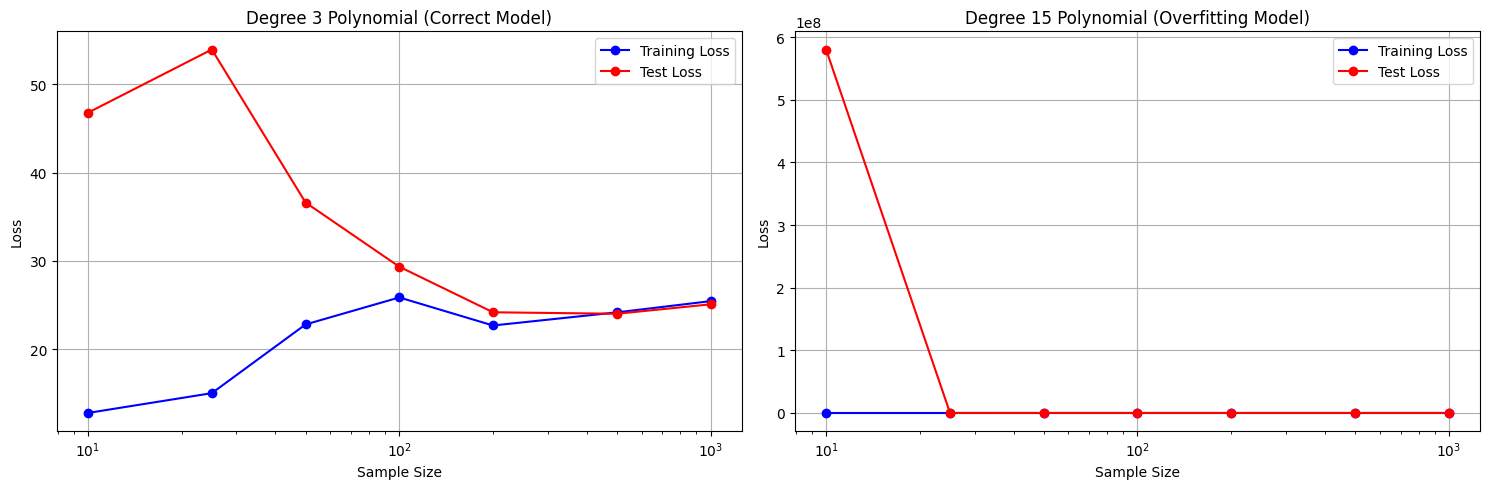

In [61]:
# Visualize how overfitting changes with sample size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sample_sizes = [10, 25, 50, 100, 200, 500, 1000]
train_losses_deg3 = []
test_losses_deg3 = []
train_losses_deg15 = []
test_losses_deg15 = []

for n_samples in sample_sizes:
    n = n_samples  # Update global n
    results, _, _, _, _ = run_experiment(3, beta_cubic, sig=5, n=n_samples, test_degrees=[3, 15])
    
    train_losses_deg3.append(results['training_loss'][3])
    test_losses_deg3.append(results['test_loss'][3])
    train_losses_deg15.append(results['training_loss'][15])
    test_losses_deg15.append(results['test_loss'][15])

# Plot for degree 3 (correct model)
ax1.plot(sample_sizes, train_losses_deg3, 'b-o', label='Training Loss')
ax1.plot(sample_sizes, test_losses_deg3, 'r-o', label='Test Loss')
ax1.set_xlabel('Sample Size')
ax1.set_ylabel('Loss')
ax1.set_title('Degree 3 Polynomial (Correct Model)')
ax1.legend()
ax1.grid(True)
ax1.set_xscale('log')

# Plot for degree 15 (overfitting model)
ax2.plot(sample_sizes, train_losses_deg15, 'b-o', label='Training Loss')
ax2.plot(sample_sizes, test_losses_deg15, 'r-o', label='Test Loss')
ax2.set_xlabel('Sample Size')
ax2.set_ylabel('Loss')
ax2.set_title('Degree 15 Polynomial (Overfitting Model)')
ax2.legend()
ax2.grid(True)
ax2.set_xscale('log')

plt.tight_layout()
plt.show()

# Reset n to original value
n = 100

Observations:

Different polynomial orders for data generation:
- The best-performing model degree should match the true data generation degree
- Under-complex models will show high bias (both training and test errors high)
- Over-complex models will show high variance (large gap between training and test errors)

Different noise levels (σ values):
- σ = 0 (deterministic): Perfect fit possible with correct degree, severe overfitting with higher degrees
- Low noise: Similar to deterministic but with small errors
- High noise: Regularizing effect - overfitting becomes less severe as noise masks model complexity

Different sample sizes:
- Very small samples (n=10): High overfitting risk, unstable estimates
- Small samples (n=25-50): Moderate overfitting, especially for high-degree polynomials  
- Large samples (n=500+): Reduced overfitting, more stable estimates, law of large numbers effect

### Experiment 4: Different Feature Distributions and Out-of-Distribution Testing

Exploring what happens when:
1. Out-of-distribution testing: Training and test sets have different feature ranges
2. Concentrated distributions: Features are concentrated in less informative regions
3. Distribution mismatch: Training data is skewed but test data is uniform (or vice versa)

In [62]:
def generate_data_custom_distribution(p, beta, sig, n, distribution_type='uniform', params=None):
    """
    Generate data with custom feature distributions
    
    Args:
        p: Degree of polynomial
        beta: True coefficients
        sig: Noise level
        n: Number of data points
        distribution_type: 'uniform', 'normal', 'uniform_shifted', 'concentrated'
        params: Dictionary with distribution parameters
    """
    if params is None:
        params = {}
    
    if distribution_type == 'uniform':
        # Standard uniform [0,1]
        u = np.random.rand(n, 1)
    elif distribution_type == 'uniform_shifted':
        # Uniform in different range [a, b]
        a = params.get('a', 2.0)
        b = params.get('b', 3.0)
        u = a + (b - a) * np.random.rand(n, 1)
    elif distribution_type == 'normal':
        # Normal distribution, clipped to [0,1] for consistency
        mean = params.get('mean', 0.5)
        std = params.get('std', 0.15)
        u = np.random.normal(mean, std, (n, 1))
        u = np.clip(u, 0, 1)  # Keep in [0,1] range
    elif distribution_type == 'concentrated':
        # Highly concentrated near one value
        center = params.get('center', 0.2)
        concentration = params.get('concentration', 0.05)
        u = np.random.normal(center, concentration, (n, 1))
        u = np.clip(u, 0, 1)
    
    # Generate y values using the polynomial
    y = (u ** np.arange(0, p+1)) @ beta + sig * np.random.randn(n, 1)
    return u, y

def run_distribution_experiment(true_degree, beta_true, sig, n, 
                              train_dist_type, train_params,
                              test_dist_type, test_params,
                              test_degrees=[1, 3, 5, 10, 15]):
    """
    Run experiment with different training and test distributions
    """
    # Generate training and test data with different distributions
    u_train, y_train = generate_data_custom_distribution(true_degree, beta_true, sig, n, 
                                                       train_dist_type, train_params)
    u_test, y_test = generate_data_custom_distribution(true_degree, beta_true, sig, n,
                                                     test_dist_type, test_params)
    
    results = {'training_loss': {}, 'test_loss': {}, 'coefficients': {}}
    
    for p in test_degrees:
        # Build model matrices (need to modify model_matrix to accept n parameter)
        X_train = model_matrix_flexible(p, u_train, n)
        X_test = model_matrix_flexible(p, u_test, n)
        
        # Train model
        betahat = train(X_train, y_train)
        
        # Calculate losses
        train_loss = test_coefficients(n, betahat, X_train, y_train)
        test_loss = test_coefficients(n, betahat, X_test, y_test)
        
        results['training_loss'][p] = train_loss
        results['test_loss'][p] = test_loss
        results['coefficients'][p] = betahat.flatten()
    
    return results, u_train, y_train, u_test, y_test

def model_matrix_flexible(p, u, n_samples):
    """Modified model_matrix that doesn't depend on global n"""
    X = np.ones((n_samples, 1))
    for p_current in range(1, p + 1):
        X = np.hstack((X, u**p_current))
    return X

#### 4a. Out-of-Distribution Testing: Different Feature Ranges

In [63]:
# Test 1: Train on [0,1], test on [2,3] - completely out of distribution
beta_cubic = np.array([[10, -140, 400, -250]]).T
test_degrees = [1, 3, 5, 10, 15]

print("=" * 60)
print("OUT-OF-DISTRIBUTION TESTING")
print("=" * 60)

results_ood, u_train_ood, y_train_ood, u_test_ood, y_test_ood = run_distribution_experiment(
    true_degree=3, 
    beta_true=beta_cubic, 
    sig=5, 
    n=100,
    train_dist_type='uniform', 
    train_params={},  # [0,1]
    test_dist_type='uniform_shifted', 
    test_params={'a': 2.0, 'b': 3.0},  # [2,3]
    test_degrees=test_degrees
)

print_results(results_ood, "Train [0,1] → Test [2,3] (Out-of-Distribution)", test_degrees)

# Test 2: Train on [2,3], test on [0,1] - reverse scenario
results_ood_rev, u_train_ood_rev, y_train_ood_rev, u_test_ood_rev, y_test_ood_rev = run_distribution_experiment(
    true_degree=3, 
    beta_true=beta_cubic, 
    sig=5, 
    n=100,
    train_dist_type='uniform_shifted', 
    train_params={'a': 2.0, 'b': 3.0},  # [2,3]
    test_dist_type='uniform', 
    test_params={},  # [0,1]
    test_degrees=test_degrees
)

print_results(results_ood_rev, "Train [2,3] → Test [0,1] (Reverse OOD)", test_degrees)

# Test 3: Same distribution for comparison
results_same, _, _, _, _ = run_distribution_experiment(
    true_degree=3, 
    beta_true=beta_cubic, 
    sig=5, 
    n=100,
    train_dist_type='uniform', 
    train_params={},  # [0,1]
    test_dist_type='uniform', 
    test_params={},  # [0,1]
    test_degrees=test_degrees
)

print_results(results_same, "Train [0,1] → Test [0,1] (Same Distribution)", test_degrees)

OUT-OF-DISTRIBUTION TESTING

Train [0,1] → Test [2,3] (Out-of-Distribution)
Degree | Training Loss | Test Loss | Difference
---------------------------------------------
   1   |    35.5102     |  4155034.7389  | +4154999.2287
   3   |    19.8844     |  30050.4177  | +30030.5334
   5   |    19.5342     |  28327693.3839  | +28327673.8496
  10   |    19.0094     |  340198458879948288.0000  | +340198458879948288.0000
  15   |    18.5340     |  3377012723463991995662336.0000  | +3377012723463991995662336.0000

Best model: Degree 3 (Test Loss: 30050.4177)

Train [2,3] → Test [0,1] (Reverse OOD)
Degree | Training Loss | Test Loss | Difference
---------------------------------------------
   1   |    10327.6868     |  16069107.3117  | +16058779.6249
   3   |    22.5613     |  91927.5914  | +91905.0301
   5   |    22.1297     |  661973205.5367  | +661973183.4070
  10   |    21.9203     |  13402315550.8349  | +13402315528.9146
  15   |    21.9124     |  36752193333.4745  | +36752193311.5621

Be

#### 4b. Concentrated Feature Distributions

In [64]:
print("\n" + "=" * 60)
print("CONCENTRATED FEATURE DISTRIBUTIONS")
print("=" * 60)

# Test 1: Training data concentrated near 0.2 (less informative region), test data uniform
results_conc1, u_train_conc1, y_train_conc1, u_test_conc1, y_test_conc1 = run_distribution_experiment(
    true_degree=3, 
    beta_true=beta_cubic, 
    sig=5, 
    n=100,
    train_dist_type='concentrated', 
    train_params={'center': 0.2, 'concentration': 0.05},
    test_dist_type='uniform', 
    test_params={},
    test_degrees=test_degrees
)

print_results(results_conc1, "Train: Concentrated at 0.2 → Test: Uniform [0,1]", test_degrees)

# Test 2: Both training and test concentrated at same location
results_conc2, _, _, _, _ = run_distribution_experiment(
    true_degree=3, 
    beta_true=beta_cubic, 
    sig=5, 
    n=100,
    train_dist_type='concentrated', 
    train_params={'center': 0.2, 'concentration': 0.05},
    test_dist_type='concentrated', 
    test_params={'center': 0.2, 'concentration': 0.05},
    test_degrees=test_degrees
)

print_results(results_conc2, "Train: Concentrated at 0.2 → Test: Concentrated at 0.2", test_degrees)

# Test 3: Training concentrated at one location, test concentrated at different location
results_conc3, _, _, _, _ = run_distribution_experiment(
    true_degree=3, 
    beta_true=beta_cubic, 
    sig=5, 
    n=100,
    train_dist_type='concentrated', 
    train_params={'center': 0.2, 'concentration': 0.05},
    test_dist_type='concentrated', 
    test_params={'center': 0.8, 'concentration': 0.05},
    test_degrees=test_degrees
)

print_results(results_conc3, "Train: Concentrated at 0.2 → Test: Concentrated at 0.8", test_degrees)


CONCENTRATED FEATURE DISTRIBUTIONS

Train: Concentrated at 0.2 → Test: Uniform [0,1]
Degree | Training Loss | Test Loss | Difference
---------------------------------------------
   1   |    21.3708     |  235.1510  | +213.7802
   3   |    20.6358     |  17450.5934  | +17429.9576
   5   |    20.2062     |  4756403960.5915  | +4756403940.3853
  10   |    18.5369     |  60233350281139961856.0000  | +60233350281139961856.0000
  15   |    18.1045     |  45159296423465426781995008.0000  | +45159296423465426781995008.0000

Best model: Degree 1 (Test Loss: 235.1510)

Train: Concentrated at 0.2 → Test: Concentrated at 0.2
Degree | Training Loss | Test Loss | Difference
---------------------------------------------
   1   |    24.5561     |  24.9456  | +0.3896
   3   |    20.9242     |  23.7237  | +2.7994
   5   |    20.5001     |  25.0266  | +4.5265
  10   |    19.4795     |  3268.0678  | +3248.5884
  15   |    18.5212     |  1552.5493  | +1534.0281

Best model: Degree 3 (Test Loss: 23.7237)


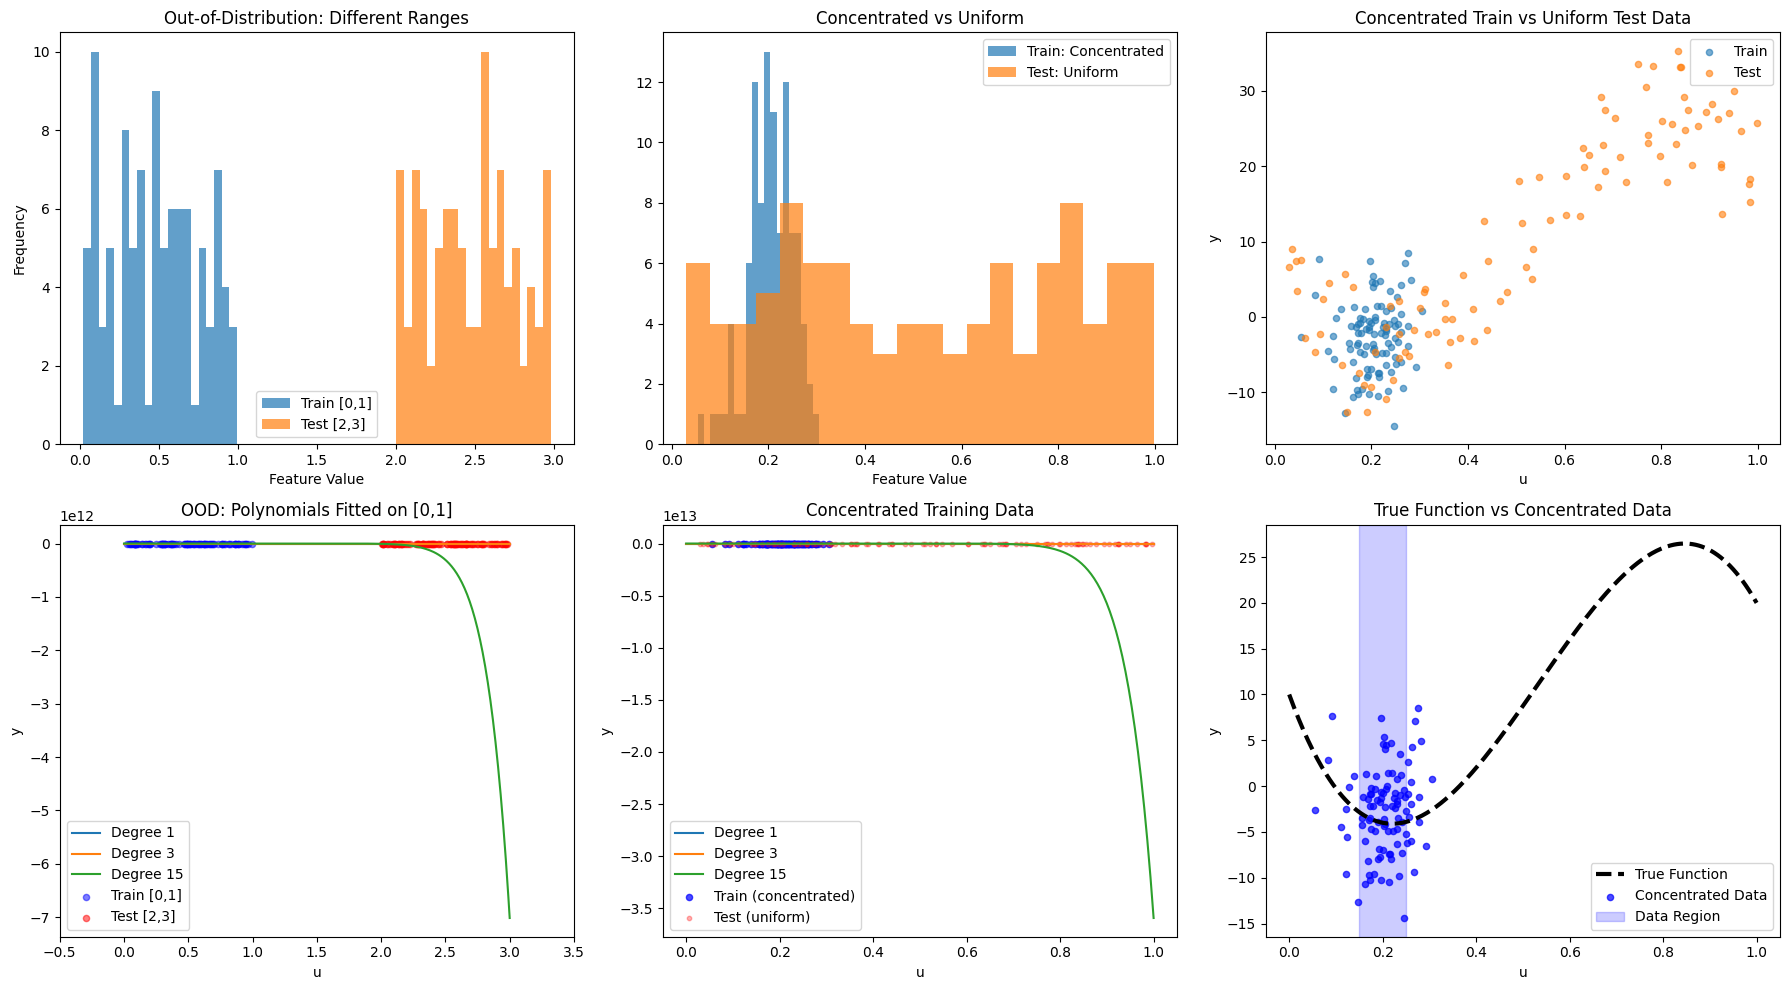

In [65]:
# Visualize the different distributions and their effects
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Row 1: Feature distributions
axes[0, 0].hist(u_train_ood.flatten(), bins=20, alpha=0.7, label='Train [0,1]')
axes[0, 0].hist(u_test_ood.flatten(), bins=20, alpha=0.7, label='Test [2,3]')
axes[0, 0].set_title('Out-of-Distribution: Different Ranges')
axes[0, 0].set_xlabel('Feature Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

axes[0, 1].hist(u_train_conc1.flatten(), bins=20, alpha=0.7, label='Train: Concentrated')
axes[0, 1].hist(u_test_conc1.flatten(), bins=20, alpha=0.7, label='Test: Uniform')
axes[0, 1].set_title('Concentrated vs Uniform')
axes[0, 1].set_xlabel('Feature Value')
axes[0, 1].legend()

axes[0, 2].scatter(u_train_conc1.flatten(), y_train_conc1.flatten(), alpha=0.6, s=20, label='Train')
axes[0, 2].scatter(u_test_conc1.flatten(), y_test_conc1.flatten(), alpha=0.6, s=20, label='Test')
axes[0, 2].set_title('Concentrated Train vs Uniform Test Data')
axes[0, 2].set_xlabel('u')
axes[0, 2].set_ylabel('y')
axes[0, 2].legend()

# Row 2: Polynomial fits for different scenarios
xx = np.linspace(0, 3, 300).reshape(-1, 1)

# Plot 1: Out-of-distribution scenario
for p in [1, 3, 15]:
    X_plot = model_matrix_flexible(p, xx, len(xx))
    y_plot = X_plot @ results_ood['coefficients'][p].reshape(-1, 1)
    axes[1, 0].plot(xx.flatten(), y_plot.flatten(), label=f'Degree {p}')

axes[1, 0].scatter(u_train_ood.flatten(), y_train_ood.flatten(), alpha=0.5, c='blue', s=20, label='Train [0,1]')
axes[1, 0].scatter(u_test_ood.flatten(), y_test_ood.flatten(), alpha=0.5, c='red', s=20, label='Test [2,3]')
axes[1, 0].set_title('OOD: Polynomials Fitted on [0,1]')
axes[1, 0].set_xlabel('u')
axes[1, 0].set_ylabel('y')
axes[1, 0].legend()
axes[1, 0].set_xlim(-0.5, 3.5)

# Plot 2: Concentrated training
xx_narrow = np.linspace(0, 1, 300).reshape(-1, 1)
for p in [1, 3, 15]:
    X_plot = model_matrix_flexible(p, xx_narrow, len(xx_narrow))
    y_plot = X_plot @ results_conc1['coefficients'][p].reshape(-1, 1)
    axes[1, 1].plot(xx_narrow.flatten(), y_plot.flatten(), label=f'Degree {p}')

axes[1, 1].scatter(u_train_conc1.flatten(), y_train_conc1.flatten(), alpha=0.7, c='blue', s=20, label='Train (concentrated)')
axes[1, 1].scatter(u_test_conc1.flatten(), y_test_conc1.flatten(), alpha=0.3, c='red', s=10, label='Test (uniform)')
axes[1, 1].set_title('Concentrated Training Data')
axes[1, 1].set_xlabel('u')
axes[1, 1].set_ylabel('y')
axes[1, 1].legend()

# Plot 3: True function for comparison
xx_true = np.linspace(0, 1, 300).reshape(-1, 1)
y_true = (xx_true ** np.arange(0, 4)) @ beta_cubic
axes[1, 2].plot(xx_true.flatten(), y_true.flatten(), 'k--', linewidth=3, label='True Function')
axes[1, 2].scatter(u_train_conc1.flatten(), y_train_conc1.flatten(), alpha=0.7, c='blue', s=20, label='Concentrated Data')

# Show the narrow range where we have data
axes[1, 2].axvspan(0.15, 0.25, alpha=0.2, color='blue', label='Data Region')
axes[1, 2].set_title('True Function vs Concentrated Data')
axes[1, 2].set_xlabel('u')
axes[1, 2].set_ylabel('y')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

Key Observations from Distribution Experiments:

Out-of-Distribution Testing:
- Extrapolation failure: Models trained on [0,1] perform poorly when tested on [2,3]
- High-degree polynomials catastrophically fail: They exhibit wild oscillations outside training range
- Lower-degree models more robust: Linear models extrapolate more predictably than high-degree polynomials
- Polynomial extrapolation is dangerous: The polynomial basis functions grow exponentially outside the training range

Concentrated Feature Distributions:
- Limited information: When training data is concentrated in a small region, models learn only local behavior
- Poor generalization: Models fail to capture global function behavior when trained on concentrated data
- Overfitting amplified: High-degree polynomials fitted to concentrated data show extreme overfitting
- Interpolation vs extrapolation: Models perform reasonably within the concentration region but fail outside

Practical Implications:
1. Feature range matters: Always ensure test data is within or close to training feature range
2. Data coverage: Ensure training data covers the full range of expected test inputs
3. Model choice: Simpler models (lower polynomial degrees) are more robust to distribution shift
4. Regularization: Consider regularization techniques when dealing with concentrated or limited data

Real-world relevance: These scenarios commonly occur in practice when:
- Training on historical data, testing on future data (temporal shift)
- Training on one population, testing on another (population shift)
- Training with limited sensor ranges, testing beyond those ranges

### Experiment 5: Cross-Validation Analysis

Cross-validation provides a more robust estimate of model performance by using multiple train/test splits. Let's explore how different numbers of folds (K) affect model selection across various scenarios.

In [66]:
def linear_cv(K, n, X, y):
    """
    Perform K-fold cross-validation
    
    Args:
        K: Number of folds
        n: Number of samples
        X: Design matrix
        y: Target values
    
    Returns:
        cv: Cross-validation score (average loss across folds)
    """
    loss = []
    fold_size = n // K
    
    for k in range(K):
        # Create test indices for fold k
        start_idx = k * fold_size
        if k == K - 1:  # Last fold gets remaining samples
            end_idx = n
        else:
            end_idx = (k + 1) * fold_size
        
        test_ind = np.arange(start_idx, end_idx)
        train_ind = np.setdiff1d(np.arange(n), test_ind)
        
        # Skip if any set is too small
        if len(train_ind) == 0 or len(test_ind) == 0:
            continue
            
        X_train, y_train = X[train_ind, :], y[train_ind, :]
        X_test, y_test = X[test_ind, :], y[test_ind, :]
        
        # Fit model and evaluate test loss
        try:
            betahat = train(X_train, y_train)
            fold_loss = test_coefficients(len(test_ind), betahat, X_test, y_test)
            loss.append(fold_loss)
        except np.linalg.LinAlgError:
            # Handle singular matrix (can happen with small folds and high-degree polynomials)
            loss.append(np.inf)
    
    cv = np.mean(loss) if loss else np.inf
    return cv

def run_cv_experiment(u_data, y_data, test_degrees, K_vals, title):
    """
    Run cross-validation experiment with different numbers of folds
    """
    n_samples = len(u_data)
    results = {}
    
    for p in test_degrees:
        X = model_matrix_flexible(p, u_data, n_samples)
        results[p] = {}
        
        for K in K_vals:
            if K <= n_samples:  # Only test if K is reasonable
                results[p][K] = linear_cv(K, n_samples, X, y_data)
            else:
                results[p][K] = np.inf
    
    # Print results
    print(f"\n{title}")
    print("=" * len(title))
    print("Degree |", end="")
    for K in K_vals:
        print(f"  K={K:2d}  |", end="")
    print()
    print("-" * (8 + 9 * len(K_vals)))
    
    for p in test_degrees:
        print(f"  {p:2d}   |", end="")
        for K in K_vals:
            cv_score = results[p][K]
            if cv_score == np.inf:
                print("    --   |", end="")
            else:
                print(f" {cv_score:6.3f} |", end="")
        print()
    
    # Find best model for each K
    print("\nBest model for each K:")
    for K in K_vals:
        valid_scores = {p: results[p][K] for p in test_degrees if results[p][K] != np.inf}
        if valid_scores:
            best_p = min(valid_scores.keys(), key=lambda x: valid_scores[x])
            print(f"K={K:2d}: Degree {best_p} (CV Score: {valid_scores[best_p]:.3f})")
        else:
            print(f"K={K:2d}: No valid models")
    
    return results

#### 5a. Cross-Validation on Original Data

In [67]:
# Test cross-validation on the original data (cubic function, n=100, sig=5)
u_original, y_original = generate_data(3, beta_cubic, 5, 100)

# Test different numbers of folds
K_vals = [2, 5, 10, 20, 50, 100]  # Including leave-one-out (K=n)
test_degrees = [1, 3, 5, 10, 15]

results_cv_original = run_cv_experiment(u_original, y_original, test_degrees, K_vals, 
                                       "Cross-Validation: Original Data (Cubic, n=100)")

# Compare with single train/test split
print(f"\nComparison with single train/test split:")
u_test_single, y_test_single = generate_data(3, beta_cubic, 5, 100)
print("Degree | Single Split | 5-Fold CV | 10-Fold CV")
print("-" * 45)
for p in test_degrees:
    X_train = model_matrix_flexible(p, u_original, 100)
    X_test = model_matrix_flexible(p, u_test_single, 100)
    betahat = train(X_train, y_original)
    single_loss = test_coefficients(100, betahat, X_test, y_test_single)
    cv_5 = results_cv_original[p][5]
    cv_10 = results_cv_original[p][10]
    print(f"  {p:2d}   |   {single_loss:.3f}     |   {cv_5:.3f}    |   {cv_10:.3f}")


Cross-Validation: Original Data (Cubic, n=100)
Degree |  K= 2  |  K= 5  |  K=10  |  K=20  |  K=50  |  K=100  |
--------------------------------------------------------------
   1   | 48.369 | 49.565 | 50.679 | 50.105 | 50.447 | 50.394 |
   3   | 21.556 | 22.806 | 22.597 | 22.422 | 22.137 | 22.175 |
   5   | 21.744 | 23.560 | 23.161 | 23.059 | 22.956 | 22.938 |
  10   | 37.410 | 57.687 | 51.616 | 52.162 | 49.403 | 47.814 |
  15   | 938.002 | 3897.382 | 77.573 | 65.557 | 189.466 | 479.109 |

Best model for each K:
K= 2: Degree 3 (CV Score: 21.556)
K= 5: Degree 3 (CV Score: 22.806)
K=10: Degree 3 (CV Score: 22.597)
K=20: Degree 3 (CV Score: 22.422)
K=50: Degree 3 (CV Score: 22.137)
K=100: Degree 3 (CV Score: 22.175)

Comparison with single train/test split:
Degree | Single Split | 5-Fold CV | 10-Fold CV
---------------------------------------------
   1   |   50.377     |   49.565    |   50.679
   3   |   22.131     |   22.806    |   22.597
   5   |   22.411     |   23.560    |   23.161


#### 5b. Cross-Validation with Different Sample Sizes

In [68]:
# Test how CV behaves with different sample sizes
sample_sizes_cv = [20, 50, 100, 200]
K_vals_small = [2, 5, 10]  # Fewer K values for efficiency

for n_size in sample_sizes_cv:
    u_cv, y_cv = generate_data(3, beta_cubic, 5, n_size)
    title = f"Cross-Validation: Sample Size n={n_size}"
    results_cv_size = run_cv_experiment(u_cv, y_cv, [1, 3, 5, 10], K_vals_small, title)


Cross-Validation: Sample Size n=20
Degree |  K= 2  |  K= 5  |  K=10  |
-----------------------------------
   1   | 74.510 | 89.448 | 85.411 |
   3   | 69.777 | 47.205 | 46.555 |
   5   | 100.016 | 60.424 | 59.640 |
  10   | 2266372361.208 | 12589.205 | 188.726 |

Best model for each K:
K= 2: Degree 3 (CV Score: 69.777)
K= 5: Degree 3 (CV Score: 47.205)
K=10: Degree 3 (CV Score: 46.555)

Cross-Validation: Sample Size n=50
Degree |  K= 2  |  K= 5  |  K=10  |
-----------------------------------
   1   | 60.264 | 48.645 | 46.570 |
   3   | 34.498 | 33.668 | 31.936 |
   5   | 55.271 | 36.853 | 35.572 |
  10   | 25488.378 | 296.873 | 40.990 |

Best model for each K:
K= 2: Degree 3 (CV Score: 34.498)
K= 5: Degree 3 (CV Score: 33.668)
K=10: Degree 3 (CV Score: 31.936)

Cross-Validation: Sample Size n=100
Degree |  K= 2  |  K= 5  |  K=10  |
-----------------------------------
   1   | 54.210 | 52.084 | 50.705 |
   3   | 33.416 | 27.539 | 26.976 |
   5   | 32.131 | 28.261 | 27.600 |
  10   | 3

#### 5c. Cross-Validation with Different Noise Levels

In [69]:
# Test CV with different noise levels (including deterministic case)
noise_levels_cv = [0, 1, 5, 20]  # Including deterministic case
K_vals_noise = [5, 10]

for sig_cv in noise_levels_cv:
    u_noise, y_noise = generate_data(3, beta_cubic, sig_cv, 100)
    if sig_cv == 0:
        title = f"Cross-Validation: Deterministic Case (σ=0)"
    else:
        title = f"Cross-Validation: Noise Level σ={sig_cv}"
    results_cv_noise = run_cv_experiment(u_noise, y_noise, [1, 3, 5, 10, 15], K_vals_noise, title)


Cross-Validation: Deterministic Case (σ=0)
Degree |  K= 5  |  K=10  |
--------------------------
   1   | 31.490 | 30.982 |
   3   |  0.000 |  0.000 |
   5   |  0.000 |  0.000 |
  10   |  0.000 |  0.000 |
  15   |  0.000 |  0.000 |

Best model for each K:
K= 5: Degree 3 (CV Score: 0.000)
K=10: Degree 3 (CV Score: 0.000)

Cross-Validation: Noise Level σ=1
Degree |  K= 5  |  K=10  |
--------------------------
   1   | 26.808 | 26.652 |
   3   |  0.682 |  0.680 |
   5   |  0.705 |  0.696 |
  10   |  0.760 |  0.733 |
  15   |  0.778 |  0.728 |

Best model for each K:
K= 5: Degree 3 (CV Score: 0.682)
K=10: Degree 3 (CV Score: 0.680)

Cross-Validation: Noise Level σ=5
Degree |  K= 5  |  K=10  |
--------------------------
   1   | 58.154 | 57.468 |
   3   | 29.661 | 30.018 |
   5   | 30.267 | 30.509 |
  10   | 31.785 | 32.239 |
  15   | 32.155 | 461.516 |

Best model for each K:
K= 5: Degree 3 (CV Score: 29.661)
K=10: Degree 3 (CV Score: 30.018)

Cross-Validation: Noise Level σ=20
Degree |  

#### 5d. Cross-Validation with Concentrated Feature Distributions

In [70]:
# Test CV with concentrated feature distributions
u_conc_cv, y_conc_cv = generate_data_custom_distribution(3, beta_cubic, 5, 100, 
                                                        'concentrated', 
                                                        {'center': 0.2, 'concentration': 0.05})

results_cv_conc = run_cv_experiment(u_conc_cv, y_conc_cv, [1, 3, 5, 10, 15], [5, 10], 
                                   "Cross-Validation: Concentrated Features (center=0.2)")

# Compare with uniform distribution
u_uniform_cv, y_uniform_cv = generate_data(3, beta_cubic, 5, 100)
results_cv_uniform = run_cv_experiment(u_uniform_cv, y_uniform_cv, [1, 3, 5, 10, 15], [5, 10], 
                                      "Cross-Validation: Uniform Features [0,1]")


Cross-Validation: Concentrated Features (center=0.2)
Degree |  K= 5  |  K=10  |
--------------------------
   1   | 24.537 | 23.938 |
   3   | 25.225 | 24.279 |
   5   | 25.976 | 25.673 |
  10   | 166.459 | 30.136 |
  15   | 1896.049 | 859.300 |

Best model for each K:
K= 5: Degree 1 (CV Score: 24.537)
K=10: Degree 1 (CV Score: 23.938)

Cross-Validation: Uniform Features [0,1]
Degree |  K= 5  |  K=10  |
--------------------------
   1   | 52.702 | 52.942 |
   3   | 25.901 | 26.050 |
   5   | 29.095 | 29.430 |
  10   | 43.732 | 37.820 |
  15   | 141.617 | 89.682 |

Best model for each K:
K= 5: Degree 3 (CV Score: 25.901)
K=10: Degree 3 (CV Score: 26.050)


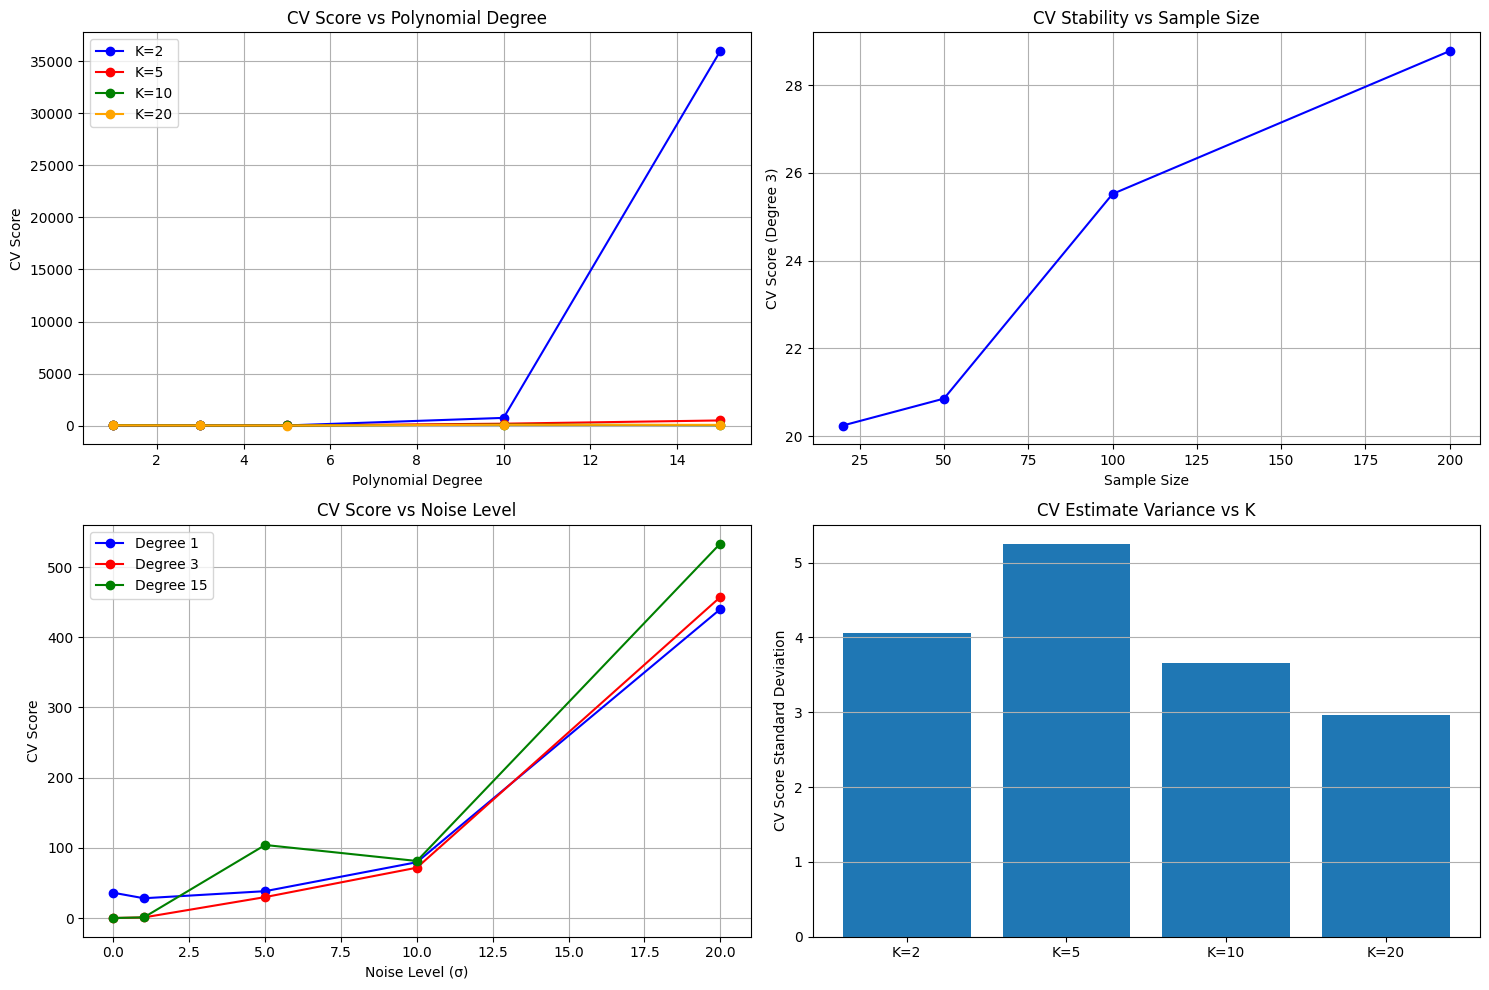

In [71]:
# Visualize CV behavior across different scenarios
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Scenario 1: CV scores vs polynomial degree for different K values
K_values = [2, 5, 10, 20]
degrees = [1, 3, 5, 10, 15]
colors = ['blue', 'red', 'green', 'orange']

u_vis, y_vis = generate_data(3, beta_cubic, 5, 100)
cv_scores = {}

for i, K in enumerate(K_values):
    scores = []
    for p in degrees:
        X = model_matrix_flexible(p, u_vis, 100)
        cv_score = linear_cv(K, 100, X, y_vis)
        scores.append(cv_score if cv_score != np.inf else None)
    cv_scores[K] = scores
    
    # Plot only valid scores
    valid_degrees = [d for d, s in zip(degrees, scores) if s is not None]
    valid_scores = [s for s in scores if s is not None]
    
    axes[0, 0].plot(valid_degrees, valid_scores, 'o-', color=colors[i], label=f'K={K}')

axes[0, 0].set_xlabel('Polynomial Degree')
axes[0, 0].set_ylabel('CV Score')
axes[0, 0].set_title('CV Score vs Polynomial Degree')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Scenario 2: Stability of CV across different sample sizes
sample_sizes = [20, 50, 100, 200]
cv_stability = []

for n_size in sample_sizes:
    u_stab, y_stab = generate_data(3, beta_cubic, 5, n_size)
    X_stab = model_matrix_flexible(3, u_stab, n_size)  # True degree
    cv_score = linear_cv(5, n_size, X_stab, y_stab)
    cv_stability.append(cv_score)

axes[0, 1].plot(sample_sizes, cv_stability, 'bo-')
axes[0, 1].set_xlabel('Sample Size')
axes[0, 1].set_ylabel('CV Score (Degree 3)')
axes[0, 1].set_title('CV Stability vs Sample Size')
axes[0, 1].grid(True)

# Scenario 3: CV with noise levels
noise_levels = [0, 1, 5, 10, 20]
cv_noise_effect = {1: [], 3: [], 15: []}

for sig in noise_levels:
    u_noise_vis, y_noise_vis = generate_data(3, beta_cubic, sig, 100)
    for p in [1, 3, 15]:
        X_noise = model_matrix_flexible(p, u_noise_vis, 100)
        cv_score = linear_cv(5, 100, X_noise, y_noise_vis)
        cv_noise_effect[p].append(cv_score if cv_score != np.inf else None)

for p, color in zip([1, 3, 15], ['blue', 'red', 'green']):
    valid_noise = [n for n, s in zip(noise_levels, cv_noise_effect[p]) if s is not None]
    valid_scores = [s for s in cv_noise_effect[p] if s is not None]
    axes[1, 0].plot(valid_noise, valid_scores, 'o-', color=color, label=f'Degree {p}')

axes[1, 0].set_xlabel('Noise Level (σ)')
axes[1, 0].set_ylabel('CV Score')
axes[1, 0].set_title('CV Score vs Noise Level')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Scenario 4: Variance of CV estimates
K_variance_test = [2, 5, 10, 20]
cv_variances = []

for K in K_variance_test:
    # Run CV multiple times to estimate variance
    scores = []
    for _ in range(10):  # 10 random splits
        u_var, y_var = generate_data(3, beta_cubic, 5, 100)
        X_var = model_matrix_flexible(3, u_var, 100)
        cv_score = linear_cv(K, 100, X_var, y_var)
        if cv_score != np.inf:
            scores.append(cv_score)
    
    cv_variances.append(np.std(scores) if scores else 0)

axes[1, 1].bar(range(len(K_variance_test)), cv_variances, 
               tick_label=[f'K={k}' for k in K_variance_test])
axes[1, 1].set_ylabel('CV Score Standard Deviation')
axes[1, 1].set_title('CV Estimate Variance vs K')
axes[1, 1].grid(True, axis='y')

plt.tight_layout()
plt.show()

Notes from Cross-Validation Experiments:

Effect of Number of Folds (K):

1. Small K (K=2-5):
   - Lower variance in CV estimates (more stable)
   - Each fold has more training data → better model fitting
   - Fewer splits → less computational cost
   - May be less reliable for model selection

2. Medium K (K=5-10):
   - Good balance between bias and variance
   - Standard choice in practice (K=5 or K=10)
   - Reliable model selection performance

3. Large K (K=20-50):
   - Higher variance in CV estimates
   - Each fold has very little training data
   - Can lead to unstable estimates, especially with small samples

4. Leave-One-Out (K=n):
   - Highest variance
   - Computationally expensive
   - Can be problematic with high-degree polynomials due to overfitting

Cross-Validation vs Single Train/Test Split:
- CV provides more robust estimates by averaging over multiple splits
- Reduces dependence on particular train/test partition
- Better for model selection, especially with limited data

Impact of Sample Size:
- Small samples (n<50): High K becomes problematic (too little training data per fold)
- Large samples (n>200): K choice becomes less critical
- Very small samples (n<20): CV may not work well due to insufficient data per fold

Impact of Noise Level:
- Deterministic case (σ=0): CV can perfectly identify optimal model degree
- Low noise: CV reliably selects correct model complexity
- High noise: Regularizing effect - CV favors simpler models

Impact of Feature Distribution:
- Concentrated features: CV may not detect overfitting as effectively
- Limited feature range: All folds suffer from same distribution limitations
- CV cannot fix fundamental data coverage problems

Practical Guidelines:
1. Use K=5 or K=10 for most applications (good bias-variance trade-off)
2. Avoid very high K with small datasets or high-dimensional models
3. Use stratified sampling when possible to ensure representative folds
4. Consider repeated CV (multiple random splits) for more stable estimates
5. Be aware that CV assumes IID data - may not work well with temporal or spatial dependencies

Limitations of CV:
- Cannot overcome fundamental problems like out-of-distribution testing
- Assumes training and test data come from same distribution
- May not detect distribution shift or extrapolation issues
- Computational cost increases linearly with K